Name : Krishna Kant Verma
Roll No: 2211cs19
Assignment 7 FOCS Lab

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report

2022-10-19 17:05:12.780759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 17:05:14.930154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 17:05:14.930269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-19 17:05:15.334889: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-19 17:05:25.782742: W tensorflow/stream_executor/platform/de

In [3]:
dataset = pd.read_csv("/home/krishna/Downloads/diabetes.csv")

In [4]:
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

DATA VISUALIZATION

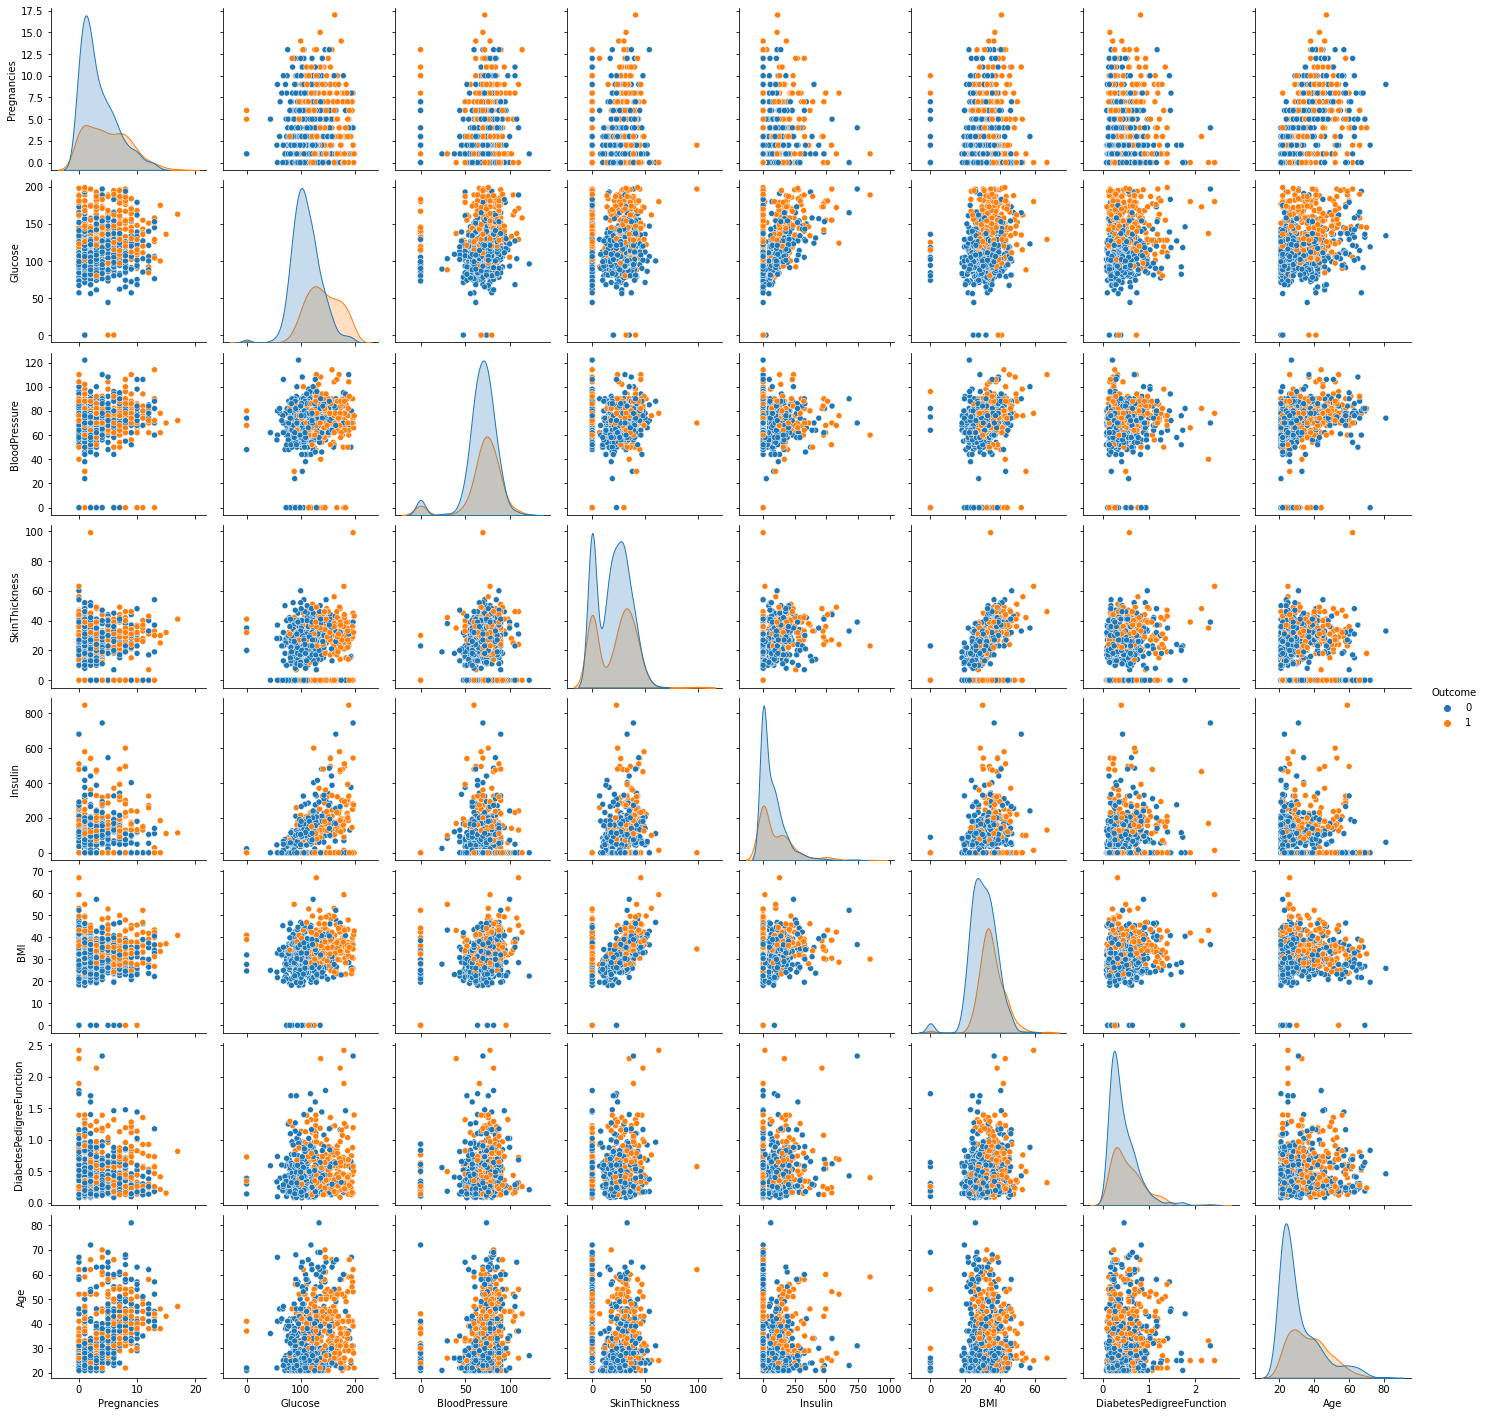

In [6]:
plot = sns.pairplot(dataset,hue ='Outcome')
plt.show()

In [7]:
X = dataset.iloc[:,0:8].values
Y = dataset.iloc[:,-1].values

In [8]:
print("X:\n",X,"\nY:\n",Y)

X:
 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 
Y:
 [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 

Seperating Dataset into traning set and testing set

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [10]:
print("X_Training Set:\n",X_train,"\nY_Training Set:\n",Y_train)

X_Training Set:
 [[  4.     97.     60.    ...  28.2     0.443  22.   ]
 [  5.    111.     72.    ...  23.9     0.407  27.   ]
 [  0.    180.     90.    ...  36.5     0.314  35.   ]
 ...
 [ 13.    126.     90.    ...  43.4     0.583  42.   ]
 [  4.    171.     72.    ...  43.6     0.479  26.   ]
 [  9.    102.     76.    ...  32.9     0.665  46.   ]] 
Y_Training Set:
 [0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 

In [11]:
print("X_Testing Set:\n",X_test,"\nY_Testing Set:\n",Y_test)

X_Testing Set:
 [[7.00e+00 1.36e+02 7.40e+01 ... 2.60e+01 6.47e-01 5.10e+01]
 [1.00e+00 1.51e+02 6.00e+01 ... 2.61e+01 1.79e-01 2.20e+01]
 [6.00e+00 1.09e+02 6.00e+01 ... 2.50e+01 2.06e-01 2.70e+01]
 ...
 [5.00e+00 1.05e+02 7.20e+01 ... 3.69e+01 1.59e-01 2.80e+01]
 [1.30e+01 7.60e+01 6.00e+01 ... 3.28e+01 1.80e-01 4.10e+01]
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]] 
Y_Testing Set:
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0]


In [12]:
scaleX = StandardScaler()
X_train = scaleX.fit_transform(X_train)

In [13]:
oneHotEncoder = OneHotEncoder()
Y_train = oneHotEncoder.fit_transform(Y_train.reshape(-1,1)).toarray()

In [14]:
print("X_Training Set:\n",X_train,"\nY_Training Set:\n",Y_train)

X_Training Set:
 [[ 0.06459212 -0.77092144 -0.43922309 ... -0.47467996 -0.07502996
  -0.94438203]
 [ 0.36223259 -0.32186694  0.15969386 ... -1.04451678 -0.18379061
  -0.5204699 ]
 [-1.12596979  1.89133023  1.05806928 ...  0.62523762 -0.46475564
   0.15778952]
 ...
 [ 2.74335641  0.15926288  1.05806928 ...  1.53962693  0.34792815
   0.7512665 ]
 [ 0.06459212  1.60265234  0.15969386 ...  1.56613097  0.0337307
  -0.60525232]
 [ 1.5527945  -0.61054483  0.35933284 ...  0.14816494  0.59566076
   1.09039621]] 
Y_Training Set:
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


**Our output layer's activation should be softmax because our outputs are integers for class labels. 
Sigmoid logistic function outputs values in range (0,1). The output of the softmax is also in range (0,1), 
but the Softmax function adds another constraint on the outputs:- the sum of the outputs must be 1. 
Therefore the outputs of softmax can be interpreted as probability of the input being each class.

**Neural Network model1 with following parameters<br>
batch size = 32<br>
epochs = 1000<br>
learning rate = 0.005<br>
Hidden units in input layer = 8<br>
Hidden units in hidden layer 1 = 512<br>
Hidden units in hidden layer 2 = 128<br>
Hidden units in Output layer = 2**

In [15]:
modelOne = Sequential()
modelOne.add(Dense(512, input_dim=8, activation='sigmoid'))
modelOne.add(Dense(128, activation='sigmoid'))
modelOne.add(Dense(2, activation='softmax'))
modelOne.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 0.005), metrics=['accuracy'])
modelOne.fit(X_train, Y_train, epochs=1000, batch_size=32)

2022-10-19 17:06:40.438792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-19 17:06:40.438881: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-19 17:06:40.438948: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (krishna): /proc/driver/nvidia/version does not exist
2022-10-19 17:06:40.439732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
18/18 [==============================] - 1s 3ms/step - loss: 0.6820 - accuracy: 0.5694
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6545
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6545
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6545
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.6545
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.6545
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.6545
Epoch 8/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6545
Epoch 9/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6545
Epoch 10/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6545

In [16]:
Y_predictOne = modelOne.predict(scaleX.transform(X_test))
#Converting predictions to label
predictOne = list()
for i in range(len(Y_predictOne)):
    predictOne.append(np.argmax(Y_predictOne[i]))

6/6 [==============================] - 0s 2ms/step


In [17]:
predictOne = np.array(predictOne)
arr1 = np.concatenate((predictOne.reshape(-1,1),Y_test.reshape(-1,1)),axis=1)
count1 = 0
for i in range(len(predictOne)):
    if arr1[i][0]==arr1[i][1]:
        count1 +=1

print("Accuracy is ", round((count1*100)/len(predictOne),2),"%",sep="")

class_names = ['class_0','class_1']
print("\t\t\tCLASSIFICATION REPORT")
print(classification_report(Y_test, predictOne, target_names=class_names))

Accuracy is 77.6%
			CLASSIFICATION REPORT
              precision    recall  f1-score   support

     class_0       0.79      0.89      0.84       123
     class_1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



**Neural Network model2 with following parameters<br>
batch size = 16<br>
epochs = 1000<br>
learning rate = 0.0045<br>
Hidden units in input layer = 8<br>
Hidden units in hidden layer 1 = 512<br>
Hidden units in hidden layer 2 = 128<br>
Hidden units in Output layer = 2**

In [32]:
modelTwo = Sequential()
modelTwo.add(Dense(512, input_dim=8, activation='sigmoid'))
modelTwo.add(Dense(128, activation='sigmoid'))
modelTwo.add(Dense(2, activation='softmax'))
modelTwo.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 0.0045), metrics=['accuracy'])
modelTwo.fit(X_train, Y_train, epochs=1000, batch_size=16)

Epoch 1/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.5712
Epoch 2/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6545
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6545
Epoch 4/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6545
Epoch 5/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6545
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6545
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6545
Epoch 8/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6545
Epoch 9/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6545
Epoch 10/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6545

In [33]:
Y_predictTwo = modelTwo.predict(scaleX.transform(X_test))
#Converting predictions to label
predictTwo = list()
for i in range(len(Y_predictTwo)):
    predictTwo.append(np.argmax(Y_predictTwo[i]))

6/6 [==============================] - 0s 2ms/step


In [34]:
predictTwo = np.array(predictTwo)
arr2 = np.concatenate((predictTwo.reshape(-1,1),Y_test.reshape(-1,1)),axis=1)
count2 = 0
for i in range(len(predictTwo)):
    if arr2[i][0]==arr2[i][1]:
        count2 +=1

print("Accuracy is ", round((count2*100)/len(predictTwo),2),"%",sep="")

class_names = ['class_0','class_1']
print("\t\t\tCLASSIFICATION REPORT")
print(classification_report(Y_test, predictTwo, target_names=class_names))

Accuracy is 78.12%
			CLASSIFICATION REPORT
              precision    recall  f1-score   support

     class_0       0.80      0.88      0.84       123
     class_1       0.74      0.61      0.67        69

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



**Neural Network model3 with following parameters<br>
batch size = 48<br>
epochs = 1000<br>
learning rate = 0.006<br>
Hidden units in input layer = 8<br>
Hidden units in hidden layer 1 = 512<br>
Hidden units in hidden layer 2 = 128<br>
Hidden units in Output layer = 2**

In [35]:
modelThree = Sequential()
modelThree.add(Dense(512, input_dim=8, activation='sigmoid'))
modelThree.add(Dense(128, activation='sigmoid'))
modelThree.add(Dense(2, activation='softmax'))
modelThree.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 0.006), metrics=['accuracy'])
modelThree.fit(X_train, Y_train, epochs=1000, batch_size=48)

Epoch 1/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6545
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6545
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6545
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6545
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6545
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6545
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6545
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6545
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6545
Epoch 10/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6545

In [36]:
Y_predictThree = modelThree.predict(scaleX.transform(X_test))
#Converting predictions to label
predictThree = list()
for i in range(len(Y_predictThree)):
    predictThree.append(np.argmax(Y_predictThree[i]))

6/6 [==============================] - 0s 2ms/step


In [37]:
predictThree = np.array(predictThree)
arr3 = np.concatenate((predictThree.reshape(-1,1),Y_test.reshape(-1,1)),axis=1)
count3 = 0
for i in range(len(predictThree)):
    if arr3[i][0]==arr3[i][1]:
        count3 +=1

print("Accuracy is ", round((count3*100)/len(predictThree),2),"%",sep="")

class_names = ['class_0','class_1']
print("\t\t\tCLASSIFICATION REPORT")
print(classification_report(Y_test, predictThree, target_names=class_names))

Accuracy is 77.6%
			CLASSIFICATION REPORT
              precision    recall  f1-score   support

     class_0       0.79      0.89      0.84       123
     class_1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



**Neural Network model4 with following parameters<br>
batch size = 24<br>
epochs = 1000<br>
learning rate = 0.025<br>
Hidden units in input layer = 8<br>
Hidden units in hidden layer 1 = 512<br>
Hidden units in hidden layer 2 = 128<br>
Hidden units in Output layer = 2**

In [38]:
modelFour = Sequential()
modelFour.add(Dense(512, input_dim=8, activation='sigmoid'))
modelFour.add(Dense(128, activation='sigmoid'))
modelFour.add(Dense(2, activation='softmax'))
modelFour.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 0.025), metrics=['accuracy'])
modelFour.fit(X_train, Y_train, epochs=1000, batch_size=24)

Epoch 1/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6545
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.6545
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6545
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.6615
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6545
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6493
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6510
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6528
Epoch 9/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6615
Epoch 10/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6545

In [39]:
Y_predictFour = modelFour.predict(scaleX.transform(X_test))
#Converting predictions to label
predictFour = list()
for i in range(len(Y_predictFour)):
    predictFour.append(np.argmax(Y_predictFour[i]))

6/6 [==============================] - 0s 2ms/step


In [40]:
predictFour = np.array(predictFour)
arr4 = np.concatenate((predictFour.reshape(-1,1),Y_test.reshape(-1,1)),axis=1)
count4 = 0
for i in range(len(predictFour)):
    if arr4[i][0]==arr4[i][1]:
        count4 +=1

print("Accuracy is ", round((count4*100)/len(predictFour),2),"%",sep="")

class_names = ['class_0','class_1']
print("\t\t\tCLASSIFICATION REPORT")
print(classification_report(Y_test, predictFour, target_names=class_names))

Accuracy is 77.6%
			CLASSIFICATION REPORT
              precision    recall  f1-score   support

     class_0       0.79      0.89      0.84       123
     class_1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



**Neural Network model5 with following parameters<br>
batch size = 32<br>
epochs = 1000<br>
learning rate = 0.05<br>
Hidden units in input layer = 8<br>
Hidden units in hidden layer 1 = 512<br>
Hidden units in hidden layer 2 = 128<br>
Hidden units in Output layer = 2<br>**

In [28]:
modelFive = Sequential()
modelFive.add(Dense(512, input_dim=8, activation='sigmoid'))
modelFive.add(Dense(128, activation='sigmoid'))
modelFive.add(Dense(2, activation='softmax'))
modelFive.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 0.05), metrics=['accuracy'])
modelFive.fit(X_train, Y_train, epochs=1000, batch_size=32)

Epoch 1/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6406
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6267
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6597
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6406
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6632
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6528
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6562
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6719
Epoch 9/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.6615
Epoch 10/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.6736

In [30]:
Y_predictFive = modelFive.predict(scaleX.transform(X_test))
#Converting predictions to label
predictFive = list()
for i in range(len(Y_predictFive)):
    predictFive.append(np.argmax(Y_predictFive[i]))

6/6 [==============================] - 0s 2ms/step


In [31]:
predictFive = np.array(predictFive)
arr5 = np.concatenate((predictFive.reshape(-1,1),Y_test.reshape(-1,1)),axis=1)
count5 = 0
for i in range(len(predictFive)):
    if arr5[i][0]==arr5[i][1]:
        count5 +=1

print("Accuracy is ", round((count5*100)/len(predictFive),2),"%",sep="")

class_names = ['class_0','class_1']
print("\t\t\tCLASSIFICATION REPORT")
print(classification_report(Y_test, predictFive, target_names=class_names))

Accuracy is 77.08%
			CLASSIFICATION REPORT
              precision    recall  f1-score   support

     class_0       0.79      0.87      0.83       123
     class_1       0.72      0.59      0.65        69

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.77       192



Thank You So Much @copyright krishna_2211cs19@iitp